<a href="https://colab.research.google.com/github/nbladzr/DSF35-DS-Dibimbing.id/blob/main/Kelulusan%20Mahasiswa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Library

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

2. Dataset

In [55]:
import pandas as pd

# Buat DataFrame
data = {
    'Nama': ['Andi', 'Budi', 'Citra', 'Dina', 'Eka', 'Fajar', 'Gina', 'Hani', 'Indra', 'Joko'],
    'IPK': [3.5, 2.8, 3.7, 2.9, 3.2, 2.6, 3.6, 3.1, 2.7, 3.4],
    'Jumlah_SKS': [144, 120, 150, 135, 140, 110, 148, 130, 125, 145],
    'Kehadiran': [95, 85, 98, 70, 90, 60, 97, 88, 75, 93],
    'Lulus': ['Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Ya', 'Tidak', 'Ya']
}
df = pd.DataFrame(data)

# Drop kolom Nama (tidak digunakan untuk model)
df = df.drop('Nama', axis=1)

# Cek data
df

,IPK,Jumlah_SKS,Kehadiran,Lulus
0,3.5,144,95,Ya
1,2.8,120,85,Tidak
2,3.7,150,98,Ya
3,2.9,135,70,Tidak
4,3.2,140,90,Ya
5,2.6,110,60,Tidak
6,3.6,148,97,Ya
7,3.1,130,88,Ya
8,2.7,125,75,Tidak
9,3.4,145,93,Ya


2.Split Data

In [74]:
# Pisahkan fitur dan label
X = df[['IPK', 'Jumlah_SKS', 'Kehadiran']]  # hanya kolom numerik
y = df['Lulus']  # label

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tampilkan hasil split
print("Data Training:")
print(X_train)
print("\nData Testing:")
print(X_test)

Data Training:
   IPK  Jumlah_SKS  Kehadiran
0  3.5         144         95
7  3.1         130         88
2  3.7         150         98
9  3.4         145         93
4  3.2         140         90
3  2.9         135         70
6  3.6         148         97

Data Testing:
   IPK  Jumlah_SKS  Kehadiran
8  2.7         125         75
1  2.8         120         85
5  2.6         110         60


3. Modeling dan Evaluasi

A. Decision Tree

=== Decision Tree ===
Akurasi   : 0.6666666666666666
Presisi   : 0.0
Recall    : 0.0
Confusion Matrix:
 [[2 1]
 [0 0]]



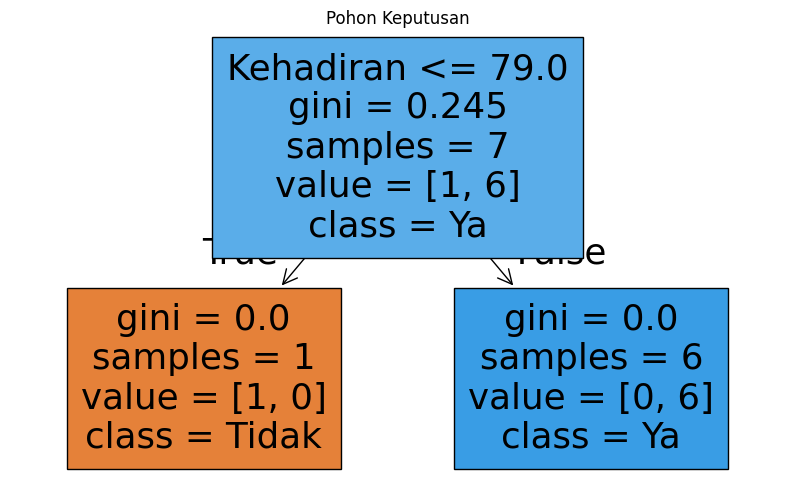

In [63]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

evaluasi_model("Decision Tree", y_test, y_pred_dt)

# Visualisasi pohon keputusan
plt.figure(figsize=(10,6))
plot_tree(dt, feature_names=X.columns, class_names=dt.classes_, filled=True)
plt.title("Pohon Keputusan")
plt.show()

B. Naive Bayes

In [64]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

evaluasi_model("Naive Bayes", y_test, y_pred_nb)

=== Naive Bayes ===
Akurasi   : 0.0
Presisi   : 0.0
Recall    : 0.0
Confusion Matrix:
 [[0 3]
 [0 0]]



C. k-NN

In [65]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

evaluasi_model("k-NN", y_test, y_pred_knn)

=== k-NN ===
Akurasi   : 0.0
Presisi   : 0.0
Recall    : 0.0
Confusion Matrix:
 [[0 3]
 [0 0]]



D. Random Forest

In [66]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

evaluasi_model("Random Forest", y_test, y_pred_rf)

=== Random Forest ===
Akurasi   : 0.0
Presisi   : 0.0
Recall    : 0.0
Confusion Matrix:
 [[0 3]
 [0 0]]



Evaluasi

In [77]:
def evaluasi_model(nama_model, y_true, y_pred):
    print(f"=== {nama_model} ===")
    print("Akurasi   :", accuracy_score(y_true, y_pred))
    print("Presisi   :", precision_score(y_true, y_pred, pos_label='Ya', zero_division=0))
    print("Recall    :", recall_score(y_true, y_pred, pos_label='Ya', zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print()

4. Visualisasi Akurasi dan Precision/Recall

<ipython-input-80-0babd3cebce6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_results, palette="Blues_d")


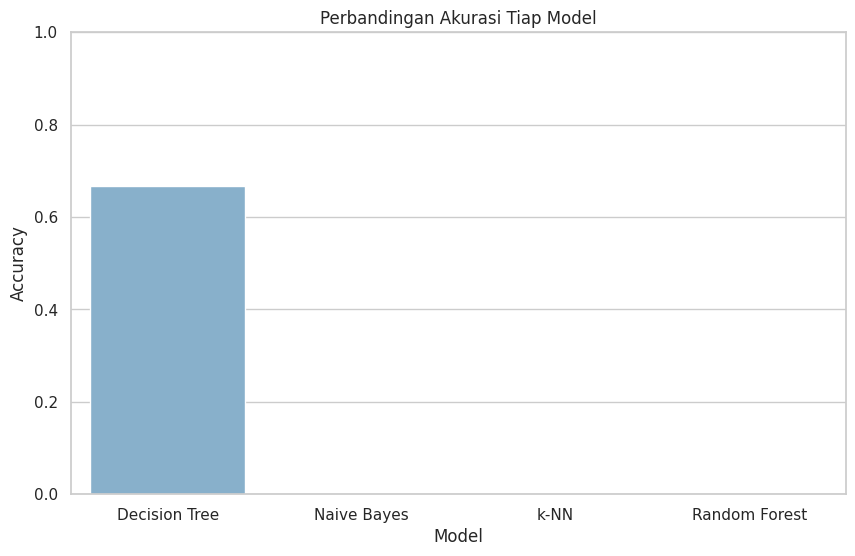

<ipython-input-80-0babd3cebce6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision (macro avg)', data=df_results, palette="Greens_d")


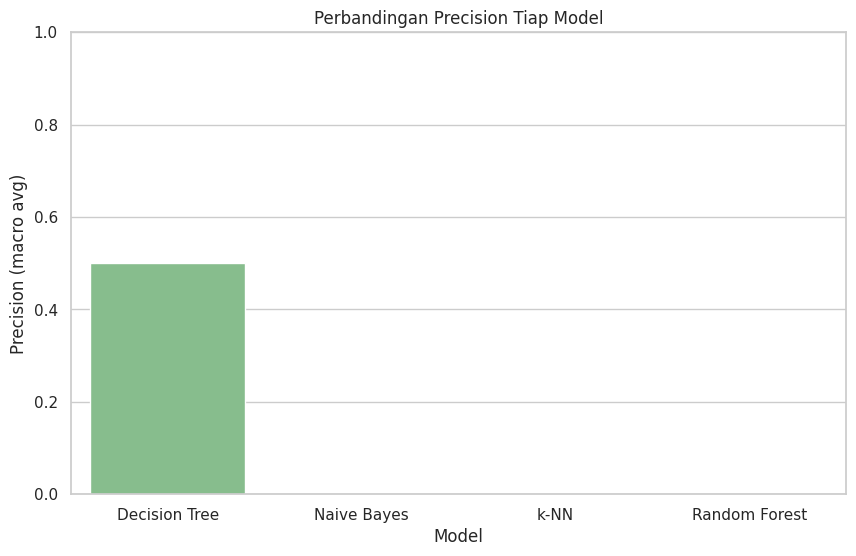

<ipython-input-80-0babd3cebce6>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall (macro avg)', data=df_results, palette="Oranges_d")


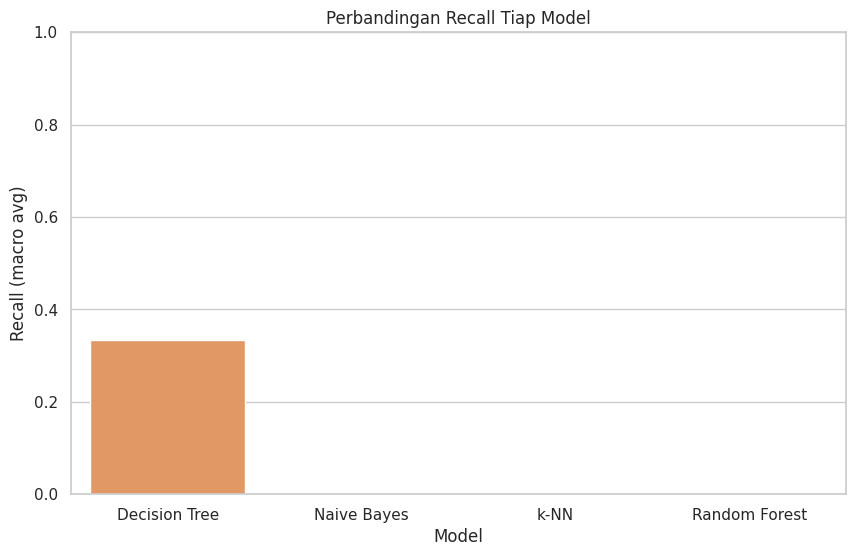

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biar tampilannya bagus
sns.set(style="whitegrid")

# Plot Akurasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_results, palette="Blues_d")
plt.title("Perbandingan Akurasi Tiap Model")
plt.ylim(0, 1)
plt.show()

# Plot Precision
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision (macro avg)', data=df_results, palette="Greens_d")
plt.title("Perbandingan Precision Tiap Model")
plt.ylim(0, 1)
plt.show()

# Plot Recall
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall (macro avg)', data=df_results, palette="Oranges_d")
plt.title("Perbandingan Recall Tiap Model")
plt.ylim(0, 1)
plt.show()